In [403]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [398]:
class simple_particle:

    def __init__ (self, mass, pos, vel, color='#1f77b4'):
        self.mass = mass
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.acel = np.array([0.0, 0.0, 0.0])
        self.color = color



class non_rotating_pool_ball(simple_particle):

    def __init__ (self, radius, mass, pos, vel, color='#1f77b4'):
        self.mass = mass
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.acel = np.array([0.0, 0.0, 0.0])
        self.color = color
        self.radius = radius
        self.is_colliding = False



def detect_collision(ball_1, ball_2):

    distance_between = np.linalg.norm(ball_1.pos - ball_2.pos)
    
    if distance_between < (ball_1.radius + ball_2.radius):
        return True
    else:
        return False



def get_collision_normal(ball_1, ball_2):

    vector = ball_1.pos - ball_2.pos
    unit_vector = vector / np.linalg.norm(vector)
    
    return unit_vector



def project_vectors(x, y):
    """ projects x onto y """
    return y * np.dot(x, y) / np.dot(y, y)



def calculate_collision(ball_1, ball_2):

    if not(ball_1.is_colliding and ball_2.is_colliding):
    #if True:
        collision_normal = get_collision_normal(ball_1, ball_2)

        ball_1_parallel = project_vectors(ball_1.vel, collision_normal)
        ball_1_perpendicular = ball_1.vel - ball_1_parallel

        ball_2_parallel = project_vectors(ball_2.vel, collision_normal)
        ball_2_perpendicular = ball_2.vel - ball_2_parallel


        mass_sum = ball_1.mass + ball_2.mass

        ball_1_parallel_final = (ball_1_parallel * (ball_1.mass - ball_2.mass) + 2 * ball_2.mass * ball_2_parallel) / mass_sum
        ball_2_parallel_final = (ball_2_parallel * (ball_2.mass - ball_1.mass) + 2 * ball_1.mass * ball_1_parallel) / mass_sum


        ball_1.vel = ball_1_perpendicular + ball_1_parallel_final
        ball_2.vel = ball_2_perpendicular + ball_2_parallel_final

        ball_1.is_colliding = True
        ball_2.is_colliding = True
    
    return 0



def integratePosVel(particle, deltaT=0.01):
    # utilizing the leapfrog method
    velHalf = particle.vel + particle.acel * deltaT / 2
    particle.pos = particle.pos + velHalf * deltaT
    #particle.acel = particle._getAcel(particle.pos, particles)
    particle.acel = 0
    particle.vel = velHalf + particle.acel * deltaT / 2



def get_rotation_matrix (alpha=0.0, beta=0.0, gamma=0.0, dtype='float64'):
    """
    alpha: angle of rotation around the x axis
    beta: angle of rotation around the y axis
    gamma: angle of rotation around the z axis
    """
    # It may be better to find a way to apply a rotation without using an external for loop.

    #rotation matrix in x
    rAlpha = np.array([[1,             0,              0],
                       [0, np.cos(alpha), -np.sin(alpha)],
                       [0, np.sin(alpha), np.cos(alpha)]], dtype=dtype)
    
    #rotation matrix in y
    rBeta = np.array([[np.cos(beta),  0,  np.sin(beta)],
                      [0,             1,             0],
                      [-np.sin(beta), 0, np.cos(beta)]], dtype=dtype)

    #rotation matrix in z
    rGamma = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                       [np.sin(gamma),  np.cos(gamma), 0],
                       [0,                          0, 1]], dtype=dtype)

    rGeneral = np.matmul(np.matmul(rGamma, rBeta), rAlpha, dtype=dtype)
    
    return rGeneral



def update_simulation_state (j):
    xs = []
    ys = []
    cs = []

    deltaT = DT # Possible implementation of a variable timestep
    
    for i in particles:
        i.integratePosVel(deltaT, particles)

        xs.append(i.pos[0])
        ys.append(i.pos[1])
        cs.append(i.color)


    ax1.clear()

    ax1.scatter(xs, ys, s=2, c=cs[:])

    #ax1.set_xlabel('X Position (AU)')
    #ax1.set_ylabel('Y Position (AU)')
    ax1.set_axis_off()

    plt.xlim(-BOUNDS, BOUNDS)
    plt.ylim(-BOUNDS, BOUNDS)


In [399]:
ITERATIONS = 3000
DELTA_T = 0.01


rotation_matrix = get_rotation_matrix(0, 0, np.radians(360))


pos_1 = rotation_matrix @ (2 * np.array([0, 1, 0]))
pos_2 = rotation_matrix @ (2 * np.array([4, 1, 0]))

vel_1 = rotation_matrix @ np.array([.2, .1, 0])
vel_2 = rotation_matrix @ np.array([-.2, .1, 0])


test_particle_1 = non_rotating_pool_ball(1, 2, pos_1, vel_1)
test_particle_2 = non_rotating_pool_ball(1, 1, pos_2, vel_2)

positions_1 = []
positions_2 = []
for i in range(ITERATIONS):
    integratePosVel(test_particle_1)
    positions_1.append(test_particle_1.pos)

    integratePosVel(test_particle_2)
    positions_2.append(test_particle_2.pos)

    if detect_collision(test_particle_1, test_particle_2):
        print(detect_collision(test_particle_1, test_particle_2))
        print(calculate_collision(test_particle_1, test_particle_2))

        #break

positions_1 = np.array(positions_1)
positions_2 = np.array(positions_2)

True
0


In [406]:
test_particle_1 != test_particle_1

False

In [ ]:
ts

In [ ]:
anim = animation.FuncAnimation(fig,
                                simulate,
                                interval=ITVL_PYPLOT,
                                blit=False)

In [400]:
positions_1.shape

(3000, 3)

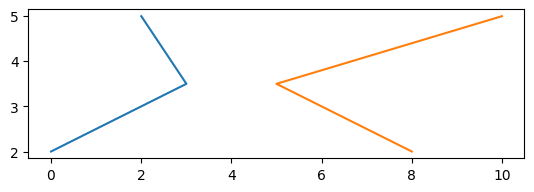

In [401]:
fig, ax = plt.subplots()

ax.plot(positions_1[:, 0], positions_1[:, 1])
ax.plot(positions_2[:, 0], positions_2[:, 1])

ax.set_aspect("equal")

In [ ]:
fig, ax = plt.subplots()
ax.plot(positions_1[:, 0])
ball_1_parallel_versor

SyntaxError: invalid syntax (561371742.py, line 3)

\begin{align}
    m_1 v_{10} + m_2 v_{20} &= m_1 v_{11} + m_2 v_{21}\\
    \frac{m_1}{2} v_{10}^2 + \frac{m_2}{2} v_{20}^2 &= \frac{m_1}{2} v_{11}^2 + \frac{m_2}{2} v_{21}^2

\end{align}

\begin{align}
    v_{11} &= \sqrt{\frac{2}{m_1} \left( \frac{m_1}{2} v_{10}^2 + \frac{m_2}{2} v_{20}^2 - \frac{m_2}{2} v_{21}^2 \right)}\\
    v_{11} &= \sqrt{ \left(v_{10}^2 + \frac{m_2}{m_1} v_{20}^2 - \frac{m_2}{m_1} v_{21}^2 \right)}\\
\end{align}